# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import t
from scipy.stats import norm
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [48]:
medical.shape

(1338, 8)

In [49]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

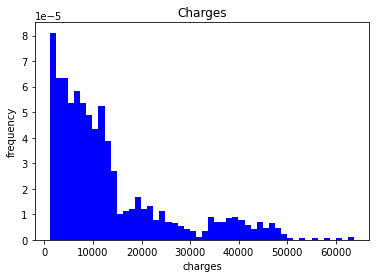

In [50]:
plt.hist(medical.charges, bins = 50, color = 'b', density = True)
plt.xlabel('charges')
plt.ylabel('frequency')
plt.title('Charges')
plt.show()

In [51]:
print('mean: {}'.format(np.mean(medical.charges)))
print('standard deviation: {}'.format(np.std(medical.charges, ddof = 1)))

mean: 13270.422265141257
standard deviation: 12110.011236694001


The histogram shows that the distribution of this data is far from being considered normal. On the other hand, we can see that the standard deviation is almost as big as the mean. Moreover, we can see in the histogram that there are (at least) two different sets of data that correspond to those charges below 15,000 and those that are above 15,000.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Te data allow me to answer to this question because those data were collected randomly, so there is no risk of bias. Moreover, there are "plenty" of them, so, 1338 data are enough tu run a one-sided test hypothesis to check whether the average charge has fallen below 12,000.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

Since we want to obtain the tightest lower bound on our sample mean, it would be better to use a one sided interval. Our concern is whether the mean charge is **below $12,000.00** We will the 95% one sided interval in two different ways:

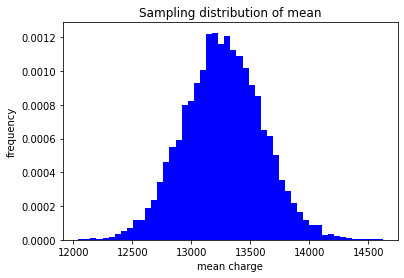

In [52]:
# bootsrap sampling distribution of the mean
# np.random.seed(50)
sd = np.array([np.mean(np.random.choice(medical.charges, size = len(medical.charges))) for i in range(10000)])
_ = plt.figure()
_ = plt.hist(sd, bins = 50, color = 'b', density = True)
_ = plt.xlabel('mean charge')
_ = plt.ylabel('frequency')
_ = plt.title('Sampling distribution of mean')
plt.show()

We compute a 95% confidence interval:

In [53]:
cint = (np.mean(sd) - np.std(sd)*t(len(medical.charges)-1).ppf(0.95), np.mean(sd))
cint

(12722.92274436066, 13269.633493180563)

We might as well generate the confidence interval estimating the mean $(m_{sd})$ and the standard error $(s_{sd}) $ of the sampling distribution of the mean by the formulas:

\begin{equation}
m_{sd} = m
\end{equation}

where $m$ is the mean charge of our sample and:

\begin{equation}
s_{sd} = \frac{s}{\sqrt{n}}
\end{equation}

where $s$ is the standard deviation of our sample and $n$ is the number of elements of the sample.

Using the formulae above, we have:

\begin{equation}
m_{sd} = 13270.42
\end{equation}

and

\begin{equation}
s_{sd} = \frac{12110.01}{\sqrt{1338}}
\end{equation}

Computing the confidence interval with the t-score for a 95% interval, we have:

In [54]:
cmean = np.mean(medical.charges)
cstd = np.std(medical.charges, ddof = 1) / np.sqrt(len(medical.charges))
(cmean - t(1338).ppf(0.95)*cstd,cmean )

(12725.487466208931, 13270.422265141257)

The  confidence interval in both cases, shows that the value of 12,000 is well below the lowest value this interval can reach. Thus, there is less than 0.05 probability of getting an interval in which amplitude lies 12,000.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ We are asumming that the standard deviation of each sample is equal to $s_{p}$

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [55]:
# First we separate our samples
ins = medical[medical['insuranceclaim'] == 1].charges
nin = medical[medical['insuranceclaim'] == 0].charges

The difference of the means of both samples is:

In [56]:
samdif = np.mean(ins) - np.mean(nin)
samdif

7602.506384231372

We can perform this test in different ways and compare our resultas. If we compute bootstrap samples of difference of means we may have the sampling distribution of the difference of means:

In [57]:
dif = np.array([np.mean(np.random.choice(ins, size = len(ins))) - np.mean(np.random.choice(nin, size = len(nin))) for i in range(10000)])

In [58]:
np.mean(dif)

7598.351656207752

In [59]:
np.std(dif)

574.9709308777198

In order to compute the test by using our bootstrap sampling distribution, we can shift our distribution by subtracting the mean to every element of our distribution and adding the value considered in our null hypothesis: $H_{0}:\mu_{1} - \mu_{2} = 0$

In [60]:
shift = dif - np.mean(dif)

Using our shifted distribution now, we will compute the P-value for a difference that is greater or equal to 7602.51:

In [61]:
Pval = len(shift[shift>=samdif])/len(shift)
Pval

0.0

Using the above formulae, we have the following results:

In [63]:
sp = np.sqrt(((len(ins) - 1)*np.var(ins,ddof = 1) + (len(nin) - 1)*np.var(nin,ddof = 1)) / (len(ins) + len(nin)-2))
root = np.sqrt((1/len(ins)) + (1/len(nin)))
sp

11520.03426877526

Considering the difference of the means, our statistic is:

In [64]:
tst = samdif / (sp*root)
tst

11.893299030876712

Hence, our P-value is:

In [72]:
Pval2 =1 -t(len(ins)+len(nin)-2).cdf(tst)
Pval2

0.0

Using the scipy.stats function, we hve:

In [75]:
sts.ttest_ind_from_stats(np.mean(ins), np.std(ins), len(ins), np.mean(nin), np.std(nin), len(nin), equal_var = True)

Ttest_indResult(statistic=11.901306943555388, pvalue=4.090550214373679e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ There is no equivalent z-test. Perhaps this is because the T-test can be used in the z-test corresponding cases with negligible differences. Let us recall that for large samples, the T-distribution converges to the normal distribution.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test